In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [2]:
tab = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0], index_col=[0])
tab.head(5)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
tab.shape

(1304, 1)

In [4]:
tab = tab[(tab['value'] >= tab['value'].quantile(0.025)) & (tab['value'] <= tab['value'].quantile(0.975))]
tab.shape

(1238, 1)

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

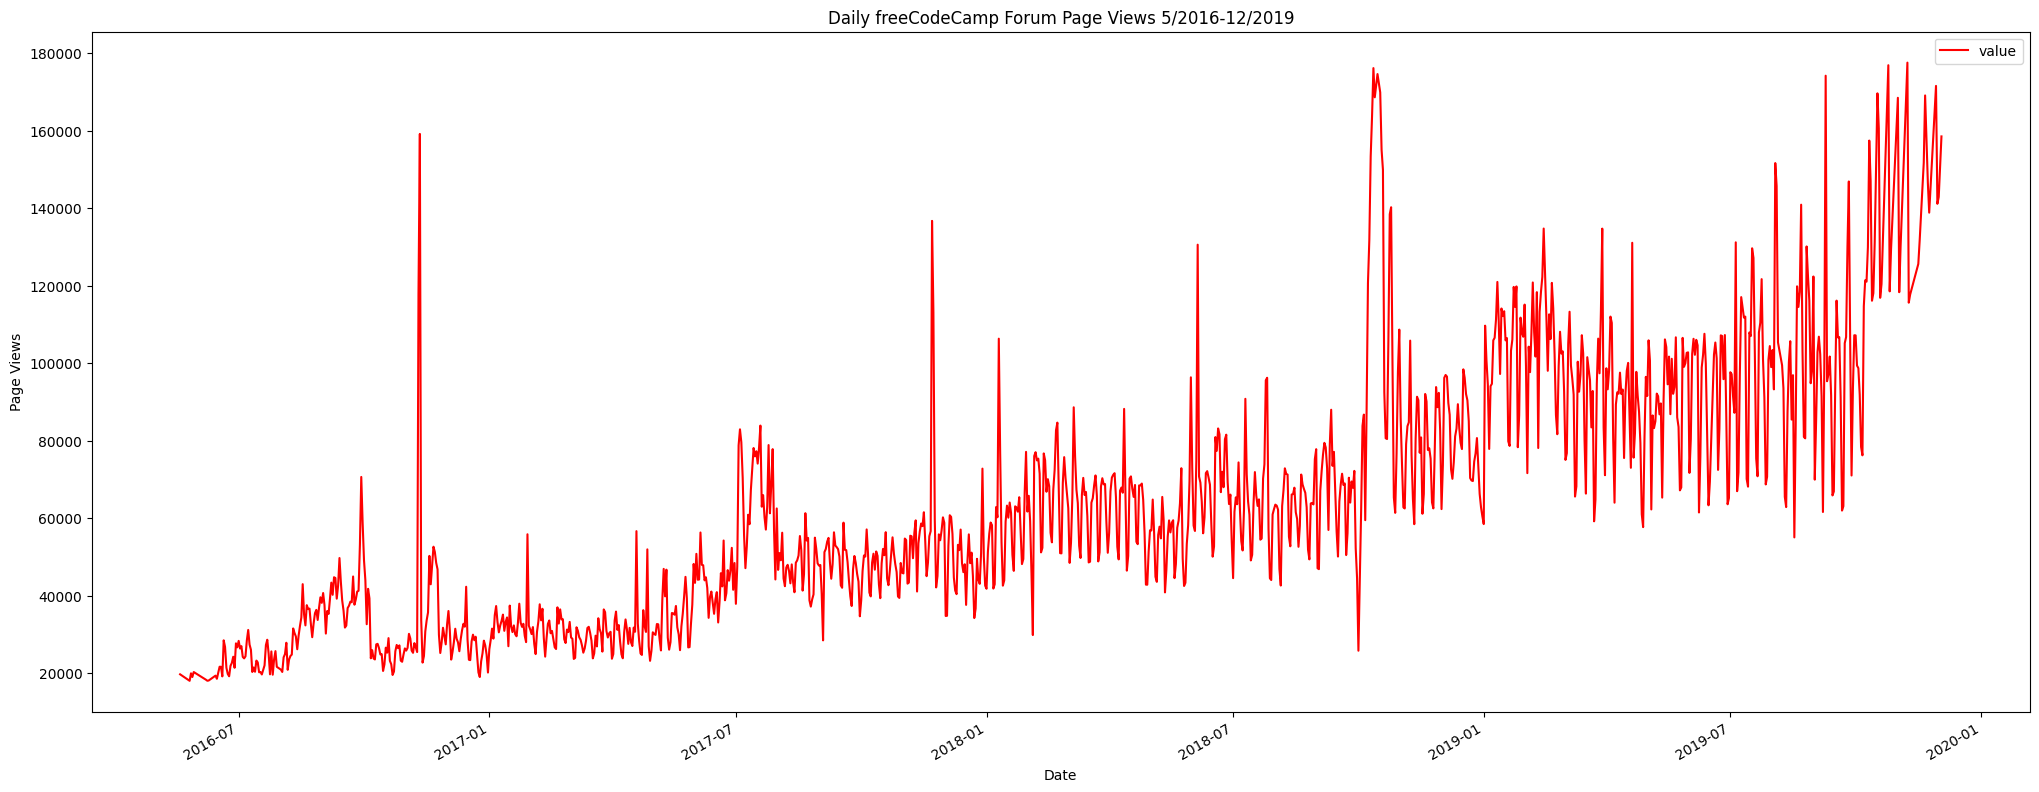

In [5]:
tab.plot(figsize=(25,10), kind='line', color='red', xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [22]:
res_tab = tab.resample('M').mean().reset_index()
res_tab.head(5)

,date,value
0,2016-05-31,19432.400000
1,2016-06-30,21875.105263
2,2016-07-31,24109.678571
3,2016-08-31,31049.193548
4,2016-09-30,41476.866667


In [132]:
cols = ['Years', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
t_tab = pd.DataFrame({'Years':['2016', '2017', '2018', '2019']})
for i in range(12):
    vval = []
    for j in range(4):
        y_tab = res_tab.loc[res_tab['date'].dt.year == (2016 + j)]
        mdat = y_tab.loc[y_tab['date'].dt.month == (i + 1), 'value']
        vval.append(mdat.values[0]) if len(mdat) != 0 else vval.append(float(0))
    t_tab[i] = vval
t_tab.columns = cols
t_tab

,Years,January,February,March,April,May,June,July,August,September,October,November,December
0,2016,0.000000,0.000000,0.000000,0.000000,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
1,2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2,2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
3,2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


<Axes: xlabel='Years', ylabel='Average Page Views'>

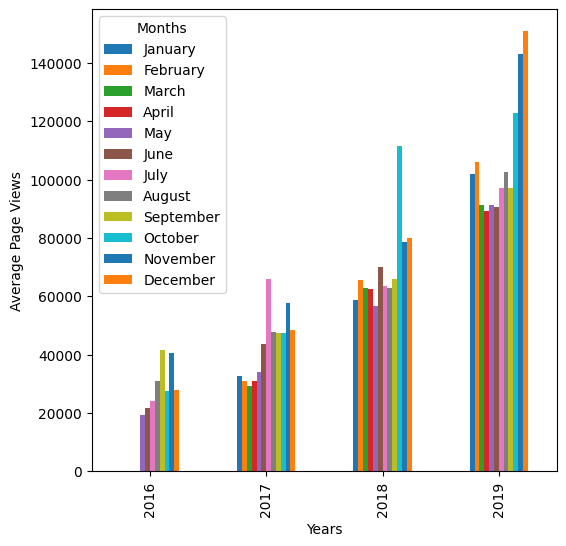

In [149]:
pcols = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bplot = t_tab.plot(x='Years', y=pcols, kind='bar', ylabel='Average Page Views', figsize=(6,6))
plt.legend(title='Months')
bplot

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.